## 1. Import the module

In [1]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## 2. Summary of the data set

Attribute Information of the dataset:

| Column name                  | Description                                  | Type       | Values                              |
| ---------------------------- | ------------------------------------------- | ----------- |  ---------------------------------- |
| Wife age                     | Wife's age                                  | Numerical   | any positive values                 |
| Wife education               | Wife's education                            | Categorical | 1=low, 2, 3, 4=high                 |
| Husband education            | Husband's education                         | Categorical | 1=low, 2, 3, 4=high                 |
| Number of children ever born | Number of children ever born                | Numerical   | any positive values                 |
| Wife religion                | Wife's religion                             | Binary      | 0=Non-Islam, 1=Islam                |
| Wife now working?            | Is wife working or not                      | Binary      | 0=Yes, 1=No                         |
| Husband occupation           | Husband's occupation                        | Categorical | 1, 2, 3, 4                          |
| Standard-of-living index     | Standard-of-living Index                    | Categorical | 1=low, 2, 3, 4=high                 |
| Media Exposure               | Media exposure                              | Binary      | 0=Good, 1=Not good                  |
| Contraceptive method used    | Contraceptive method used (Class Attribute) | Categorical | 1=No-use, 2=Long-term, 3=Short-term |


### 2.1 Read the data and split the data into 70% train and 30% test set.

In [2]:
# Rename the column name
df = pd.read_csv(
    "../data/raw/contraceptive.csv",
    header=0,
    names=[
        "Wife age",
        "Wife education",
        "Husband education",
        "Number of children ever born",
        "Wife religion",
        "Wife now working?",
        "Husband occupation",
        "Standard-of-living index",
        "Media exposure",
        "Contraceptive method used",
    ],
)

# Split the data into 70:30
df = df.rename(columns=lambda x: x.replace(" ", "_"))
df= df.rename(columns=lambda x: x.replace("'s", ""))
df
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.head()

,Wife_age,Wife_education,Husband_education,Number_of_children_ever_born,Wife_religion,Wife_now_working?,Husband_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
834,41,1,4,9,1,1,2,1,0,3
491,40,4,4,6,0,0,1,4,0,2
376,40,3,3,3,1,1,2,2,1,1
250,34,4,4,3,0,1,1,2,0,1
228,47,1,4,8,1,1,3,3,0,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 834 to 1389
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife_age                      1031 non-null   int64
 1   Wife_education                1031 non-null   int64
 2   Husband_education             1031 non-null   int64
 3   Number_of_children_ever_born  1031 non-null   int64
 4   Wife_religion                 1031 non-null   int64
 5   Wife_now_working?             1031 non-null   int64
 6   Husband_occupation            1031 non-null   int64
 7   Standard-of-living_index      1031 non-null   int64
 8   Media_exposure                1031 non-null   int64
 9   Contraceptive_method_used     1031 non-null   int64
dtypes: int64(10)
memory usage: 88.6 KB


In [4]:
train_df.describe()

,Wife_age,Wife_education,Husband_education,Number_of_children_ever_born,Wife_religion,Wife_now_working?,Husband_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,32.730359,2.941804,3.441319,3.335597,0.859360,0.756547,2.115422,3.132881,0.078565,1.909796
std,8.349353,1.013744,0.804236,2.412323,0.347819,0.429374,0.872039,0.969834,0.269188,0.875010
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


## 2.2 Distribution of target values

In [5]:
train_df['Contraceptive_method_used'].value_counts()

1    445
3    352
2    234
Name: Contraceptive_method_used, dtype: int64

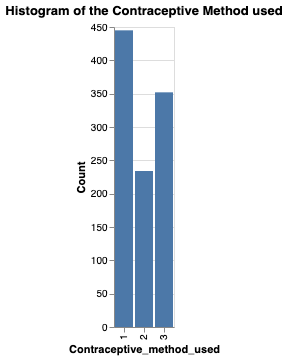

In [6]:
alt.Chart(train_df, title="Histogram of the Contraceptive Method used").mark_bar().encode(
    x=alt.X("Contraceptive_method_used", type="ordinal"),
    y=alt.Y("count()", title="Count"),
)

There is a class imbalance problem, but it is not necessary to immediately start our modeling plan with over- or under-sampling. We shall explore the data and create our model first.

## 3. Exploratory Data Analysis

### 3.1 Specify Numerical and Categorical Columns

In [7]:
numerical_features = ["Wife_age", "Number_of_children_ever_born"]
categorical_features = list(train_df.drop(columns=(numerical_features + ['Contraceptive_method_used'])).columns)

### 3.2 Plot the Histogram of all numerical features

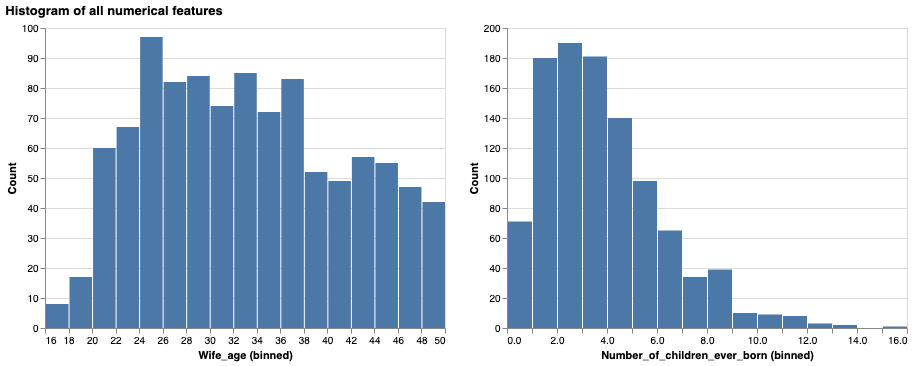

In [8]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=30)),
    y=alt.Y("count()", title="Count"),
).repeat(numerical_features, title="Histogram of all numerical features")

Two graphs are skewed to the right. This is expected as there are more young wife than old wife and most people have around two to three kids.

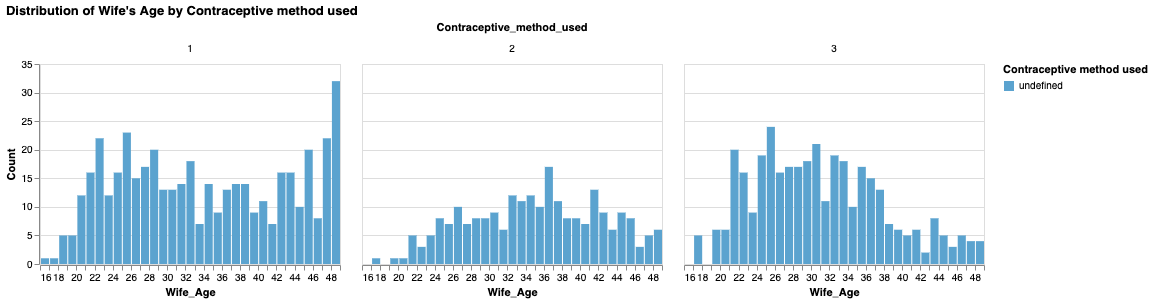

In [9]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X("Wife_age:Q", bin=alt.Bin(maxbins=40), title="Wife_Age"),
    y=alt.Y("count()", title="Count"),
    color="Contraceptive method used:O",
).properties(width=300, height=200).facet(
    "Contraceptive_method_used",
    title="Distribution of Wife's Age by Contraceptive method used",
)

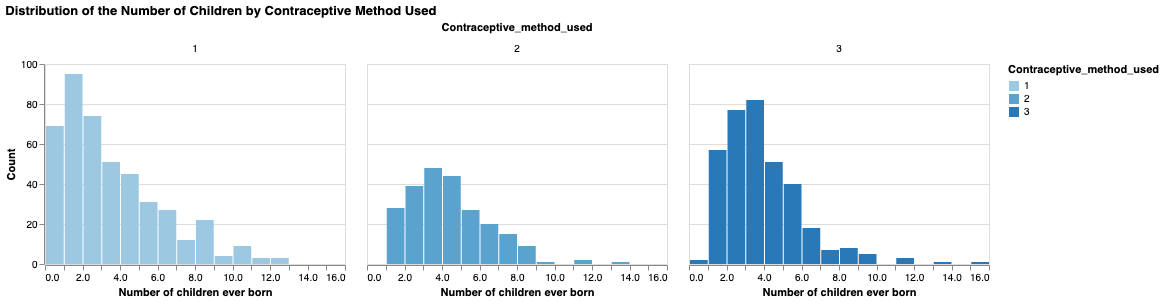

In [10]:
alt.Chart(
    train_df
).mark_bar().encode(
    x=alt.X(
        "Number_of_children_ever_born",
        title="Number of children ever born",
        bin=alt.Bin(maxbins=30),
    ),
    y=alt.Y("count()", title="Count"),
    color="Contraceptive_method_used:O",
).properties(
    width=300, height=200
).facet(
    "Contraceptive_method_used",
    title="Distribution of the Number of Children by Contraceptive Method Used"
)

### 3.3 Counting combinations of categorical features

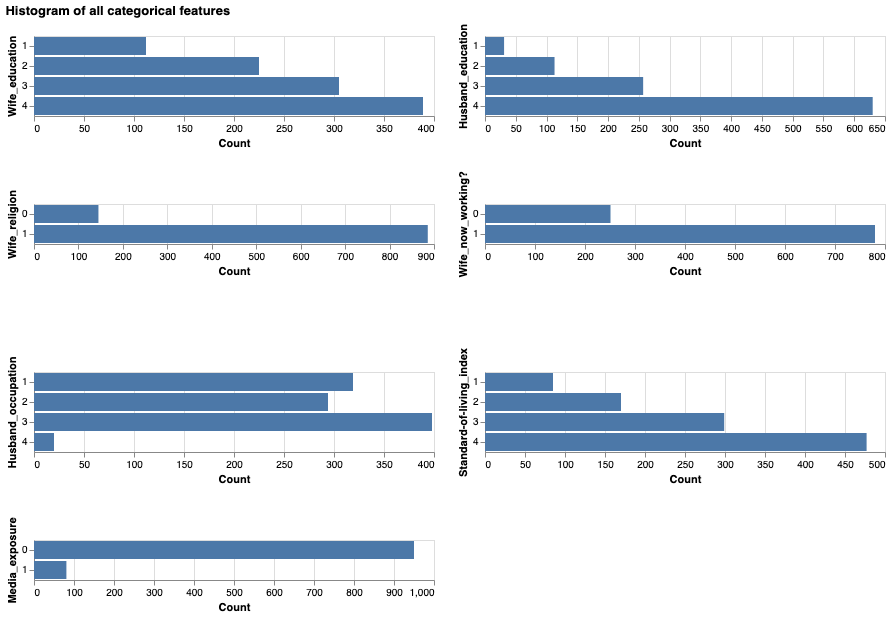

In [11]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X("count()", title="Count"),
    y=alt.Y(alt.repeat(), type="nominal"),
).repeat(categorical_features, columns=2, title="Histogram of all categorical features")

Overall, the survey captured women with high levels of education, religious belief, educated partners and living at a high standard of living.

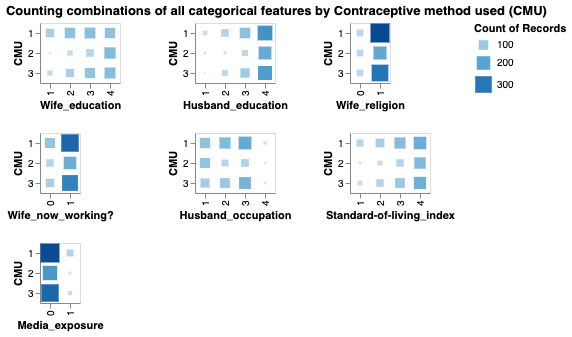

In [12]:
alt.Chart(train_df).mark_square().encode(
    x=alt.X(alt.repeat(), type="nominal"),
    y=alt.Y("Contraceptive_method_used:O", title="CMU"),
    color="count()",
    size="count()",
).repeat(
    categorical_features,
    columns=3,
    title="Counting combinations of all categorical features by Contraceptive method used (CMU)",
)

We spotted that most of the observation by target class 1 (no contraception) lies on certain categorical variables. But since there is class imbalance problem, we cananot imply they are correlated.

## ML Model

In [13]:
# Method 1:

In [14]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

In [15]:
X_train, y_train = train_df.drop(columns=["Contraceptive_method_used"]), train_df["Contraceptive_method_used"]
X_test, y_test = test_df.drop(columns=["Contraceptive_method_used"]), test_df["Contraceptive_method_used"]

In [16]:
X_train.rename(columns= {"Standard-of-living_index" : "Standard_of_living_index"})

,Wife_age,Wife_education,Husband_education,Number_of_children_ever_born,Wife_religion,Wife_now_working?,Husband_occupation,Standard_of_living_index,Media_exposure
834,41,1,4,9,1,1,2,1,0
491,40,4,4,6,0,0,1,4,0
376,40,3,3,3,1,1,2,2,1
250,34,4,4,3,0,1,1,2,0
228,47,1,4,8,1,1,3,3,0
...,...,...,...,...,...,...,...,...,...
1041,24,3,3,2,1,0,3,2,0
1122,30,3,4,4,0,1,2,3,0
1346,35,2,3,6,1,1,2,3,0
1406,36,1,1,5,1,1,3,3,0


In [17]:
import sys
import time
import os
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
import mglearn
from IPython.display import display

from sklearn.dummy import DummyClassifier, DummyRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
)


from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.svm import SVC, SVR

%matplotlib inline

In [18]:
numeric_features = ['Wife_age', 'Number_of_children_ever_born']
ordinal_features = ["Wife_education","Husband_education","Husband_occupation", "Standard_of_living_index"]
passthrough_features = ['Wife_religion','Wife_now_working?','Media_exposure'] 

In [19]:
preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()),numeric_features,),
    (OrdinalEncoder(),ordinal_features,),  
    ("passthrough", passthrough_features),)

In [20]:
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Wife_age', 'Number_of_children_ever_born']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['Wife_education', 'Husband_education',
                                  'Husband_occupation',
                                  'Standard_of_living_index']),
                                ('passthrough', 'passthrough',
                                 ['Wife_religion', 'Wife_now_working?',
                                  'Media_exposure'])])

In [21]:
df = preprocessor.fit_transform(X_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
models_bal = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100, multi_class='ovr',random_state=123 ),
    "RBF SVM": SVC(random_state=123),
}

In [ ]:
results_bal = {}
results_bal_f = {}

for keys, value in models_bal.items():
    pipe_bal = make_pipeline(preprocessor, value)
    results_bal[keys] = cross_validate(pipe_bal, X_train, y_train, cv = 5, return_train_score = True)
    results_bal_f[keys] = pd.DataFrame(results_bal[keys]).mean()

pd.DataFrame(results_bal_f)

##Hyper parameter 

In [ ]:
pipe= make_pipeline(preprocessor, SVC(random_state=123))

param = {
    "svc__class_weight": [None,"balanced"],
    "svc__gamma": np.logspace(-3, 0, 4),
    "svc__C": np.logspace(-2, 3, 6)
}

In [ ]:
random_search = RandomizedSearchCV(pipe, param, n_iter=200, verbose=1, n_jobs=-1, random_state=123)
random_search.fit(X_train, y_train)

In [ ]:
pd.DataFrame(random_search.cv_results_)[
    [
        "rank_test_score",
        "mean_test_score",
        "param_svc__gamma",
        "param_svc__C",
        "param_svc__class_weight",
        "mean_fit_time",
    ]
].set_index("rank_test_score").sort_index().T

In [ ]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

In [ ]:
# from sklearn.feature_selection import SequentialFeatureSelector

# pipe_comb = make_pipeline(
#     preprocessor,
#     PolynomialFeatures(),
#     SequentialFeatureSelector(SVC(), direction="backward"),
#     SVC())

In [ ]:
# results = {}
# results['pol_comb'] = cross_validate(pipe_comb, X_train, y_train, return_train_score=True)

In [ ]:
# pd.DataFrame(results)

## Method 2: Making it a binary class

In [ ]:
X_train, y_train = train_df.drop(columns=["Contraceptive_method_used"]), train_df["Contraceptive_method_used"]
X_test, y_test = test_df.drop(columns=["Contraceptive_method_used"]), test_df["Contraceptive_method_used"]

In [ ]:
#Converting it to a binary model(train set)
y_train = y_train.replace(1,0)
y_train = y_train.replace([2,3],1)

In [ ]:
#Converting it to a binary model(test set)
y_test = y_test.replace(1,0)
y_test = y_test.replace([2,3],1)

In [ ]:
y_train.value_counts()

In [ ]:
models_bal = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100, multi_class='ovr',random_state=123 ),
    "RBF SVM": SVC(random_state=123),
}

In [ ]:
results_bal = {}
results_bal_f = {}

for keys, value in models_bal.items():
    pipe_bal = make_pipeline(preprocessor, value)
    results_bal[keys] = cross_validate(pipe_bal, X_train, y_train, cv = 5, return_train_score = True)
    results_bal_f[keys] = pd.DataFrame(results_bal[keys]).mean()

pd.DataFrame(results_bal_f)

In [ ]:
random_search = RandomizedSearchCV(pipe_bal, param, n_iter=200, verbose=1, n_jobs=-1, random_state=123)
random_search.fit(X_train, y_train)

In [ ]:
param = {
    "svc__class_weight": [None,"balanced"],
    "svc__gamma": np.logspace(-3, 0, 4),
    "svc__C": np.logspace(-2, 3, 6)
}

In [ ]:
pd.DataFrame(random_search.cv_results_)[
    [
        "rank_test_score",
        "mean_test_score",
        "param_svc__gamma",
        "param_svc__C",
        "param_svc__class_weight",
        "mean_fit_time",
    ]
].set_index("rank_test_score").sort_index().T

In [ ]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

In [ ]:
pipe_f= make_pipeline(preprocessor, SVC(C=10, gamma =0.01, random_state=123))

In [ ]:
pipe_f.fit(X_train, y_train)

In [ ]:
y_test.value_counts()

In [ ]:
#Classification Report

from sklearn.metrics import classification_report

print(
    classification_report(
        y_test, pipe_f.predict(X_test), target_names=["contra_no", "contra_yes"]
    )
)

In [1]:
from sklearn.metrics import roc_auc_score

roc_auc_svc = roc_auc_score(y_test, pipe_f.predict(X_test))
print("AUC: {:.3f}".format(roc_auc_svc))

NameError: name 'y_test' is not defined

In [ ]:
# AUC graph


In [ ]:
# PR graph

precision_svc_bal, recall_svc_bal, thresholds_svc_bal = precision_recall_curve(
    y_test, grid_search.predict_proba(X_test)[:, 1]
)

close_default_svc_bal = np.argmin(np.abs(thresholds_svc_bal - 0.5))

def plot_PR_curve(
    precision,
    recall,
    close_default,
    label="SVC_bal: PR curve",
    marker_label = "threshold"
):
    plt.plot(precision, recall, label=label)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.plot(
        precision[close_default],
        recall[close_default],
        "o",
        markersize=12,
        label=marker_label
    )
    plt.legend(loc="best");


In [27]:
final_svc_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Wife_age',
                                                   'Number_of_children_ever_born']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Wife_education',
                                                   'Husband_education',
                                                   'Husband_occupation',
                                                   'Standard

In [24]:
final_params

{'svc__gamma': 0.01, 'svc__class_weight': None, 'svc__C': 10.0}